<a href="https://colab.research.google.com/github/sikha2552/Biomedical_Image_Analysis_-Datacamp-/blob/main/Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Read the Dicom image**

In [8]:
import imageio
im=imageio.imread("/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Biomedical_image_analysis/chest-220.dcm")
#print the image type
print("image type:",type(im))
#print the image shape
print("Image shape is :{}".format(im.shape))


image type: <class 'imageio.core.util.Array'>
Image shape is :(512, 512)


### **Print the Metadata**

In [9]:
print("The complete metadata: {}".format(im.meta.keys()))

The complete metadata: odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])


In [10]:
print("The Modality is:{}".format(im.meta['Modality']))
print("The Study date is:{}".format(im.meta['StudyDate']))
print("The Patient Name is:{}".format(im.meta['PatientName']))


The Modality is:CT
The Study date is:20040529
The Patient Name is:STS_007


### **Visualize the image**

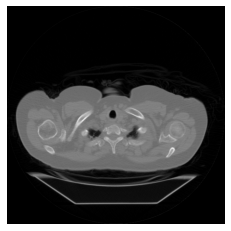

In [13]:
import matplotlib.pyplot as plt
plt.imshow(im,cmap='gray')
plt.axis('off')
plt.show()
#cmap controls the color mappings for each value. The "gray" colormap is common, but many others are available.

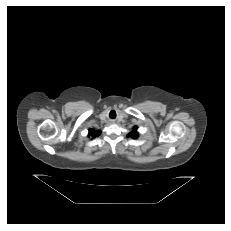

In [14]:
#increase the contrast and plot the image
#vmin and vmax control the color contrast between values. Changing these can reduce the influence of extreme values.
plt.imshow(im,cmap='gray',vmin=-200,vmax=200)
plt.axis("off")
plt.show()

### **Deal with Volumes(Higher dimensional data)**

Image "stacks" are a useful metaphor for understanding multi-dimensional data. Each higher dimension is a stack of lower dimensional arrays.

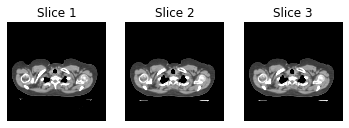

In [20]:
#Read 3 slices and stack them together in to a 3d volume using np.stack function
import numpy as np
im1=imageio.imread("/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Biomedical_image_analysis/chest-220.dcm")
im2=imageio.imread("/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Biomedical_image_analysis/chest-221.dcm")
im3=imageio.imread("/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Biomedical_image_analysis/chest-221.dcm")
#plt.imshow(im1,cmap='gray'); plt.axis('off');plt.show()
plt.subplot(1,3,1);plt.imshow(im1,cmap='gray',vmin=-200,vmax=200);plt.title("Slice 1");plt.axis('off');
plt.subplot(1,3,2);plt.imshow(im2,cmap='gray',vmin=-200,vmax=200);plt.title("Slice 2");plt.axis('off');
plt.subplot(1,3,3);plt.imshow(im3,cmap='gray',vmin=-200,vmax=200);plt.title("Slice 3");plt.axis('off');


In [21]:
#Stack the slices
vol=np.stack([im1,im2,im3])
#print volume dimensions
print("The volume dimension is:{}".format(vol.shape))

The volume dimension is:(3, 512, 512)


In [26]:
#Load volume using volread
vol1=imageio.volread("/content/drive/MyDrive/MY_Learnings/DATACAMP-Courses/Biomedical_image_analysis/tcia-chest-ct-sample/")
print('Available metadata:', vol1.meta.keys())
print("The shape of the volume is:{}".format(vol1.shape))


Reading DICOM (examining files): 1/5 files (20.0%)5/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)
Available metadata: odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])
The shape of the volume is:(5, 512, 512)


**Field of view**

The amount of physical space covered by an image is its field of view, which is calculated from two properties:

Array shape, the number of data elements on each axis. Can be accessed with the shape attribute.
Sampling resolution, the amount of physical space covered by each pixel. Sometimes available in metadata (e.g., meta['sampling']).
For this exercise, multiply the array shape and sampling resolution along each axis to calculate the field of view of vol. All values are in millimeters.

### **Subplots**
* Create a subplots grid where nrows=2 and ncols=1.
* Draw im1 and im2 on the first and second subplots respectively. Use a "gray" colormap for each.
* For each subplot, turn off the axis ticks and labels.
* Render the figure






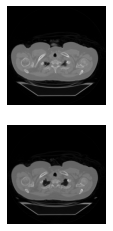

In [27]:
fig,axes=plt.subplots(nrows=2,ncols=1)
axes[0].imshow(im1,cmap='gray')
axes[1].imshow(im2,cmap='gray')
for ax in axes:
  ax.axis('off')
plt.show()  


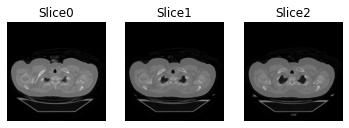

In [37]:
#Using Loops
fig,axes=plt.subplots(nrows=1,ncols=3)
for i in range(len(axes)):
   axes[i].imshow(vol1[i],cmap='gray')
   axes[i].set_title("Slice{}".format(i))
for ax in axes:
  ax.axis('off')
plt.show()  
